# **⭐Introduction to Reinforcement Learning⭐**
---

* **Environment** 🌍: Challenges to be solved
* **Agent** 🧠: Learner, decision-maker
* **Action** 🎯: Agent's choice in response to a state
* **State** 📸: Snapshot of the environment at a given time
* **Reward** 🏆: Feedback for the agent’s action

## **✨01 - Q-Learning in a Simple 1D**

### 🔖1. **The Environment (`SimpleEnvironment`)**

```python
class SimpleEnvironment:
    def __init__(self):
        self.state = 0  # initial state
    
    def get_initial_state(self):
        self.state = 0
        return self.state
    
    def execute(self, action):
        if action == "left":
            self.state -= 1
        else:  # action == "right"
            self.state += 1
        
        # Reward: closer to 0 = better
        reward = -abs(self.state)
        return self.state, reward
```

* **What it is:**
  This is the *world* the agent interacts with.
* **States:** just integers (`-3, -2, -1, 0, 1, 2, ...`).
* **Actions:** `"left"` (state -1) or `"right"` (state +1).
* **Reward:**

  * At `state = 0`, reward = `0` (best place to be).
  * Farther away = more negative (bad).
  * Example: `state=2 → reward=-2`.

>👉 **Key RL lesson:** The environment defines **rules** (states, actions, rewards). The agent must learn how to act.


### 🔖2. **The Agent (`QLearningAgent`)**

```python
class QLearningAgent:
    def __init__(self, actions, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.q_table = defaultdict(lambda: {a: 0.0 for a in actions})
        self.actions = actions
        self.alpha = alpha      # learning rate
        self.gamma = gamma      # discount factor
        self.epsilon = epsilon  # exploration rate
```

#### Key Components:

* **Q-table:**
  A dictionary that stores **value estimates** for each `(state, action)`.
  Example:

  ```python
  q_table[0] = {"left": -0.2, "right": -0.1}
  ```
* **α (alpha):** learning rate → how much new experience overwrites old knowledge.
* **γ (gamma):** discount factor → how much the agent cares about *future rewards*.
* **ε (epsilon):** exploration rate → chance of doing a *random* action instead of best-known one.

>👉 **Key RL lesson:** The agent needs memory (Q-table) + rules to balance exploration vs exploitation.


### 🔖3. **Choosing Actions**

```python
def choose_action(self, state):
    if random.random() < self.epsilon:
        return random.choice(self.actions)  # explore
    q_values = self.q_table[state]
    return max(q_values, key=q_values.get) # exploit
```

* **Exploration (ε chance):** try random moves → discover new possibilities.
* **Exploitation (1-ε chance):** pick best move from Q-table → use knowledge.

>👉 **Key RL lesson:** RL agents must explore to learn, but exploit to perform well.


### 🔖4. **Learning from Experience**

```python
def update(self, state, action, reward, next_state):
    q_current = self.q_table[state][action]
    q_next_max = max(self.q_table[next_state].values())
    self.q_table[state][action] += self.alpha * (reward + self.gamma * q_next_max - q_current)
```

This is the **Q-learning update rule**:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \big[ r + \gamma \max_{a'} Q(s',a') - Q(s,a) \big]
$$

Where:

* `s` = current state
* `a` = action taken
* `r` = reward received
* `s'` = new state after action
* `a'` = next possible actions

>👉 **Key RL lesson:** Agent adjusts its Q-values to better predict rewards. This is the *learning brain* of RL.


### 🔖5. **Running the Loop**

```python
state = env.get_initial_state()
for i in range(n_iterations):
    action = agent.choose_action(state)             # Pick action
    next_state, reward = env.execute(action)        # Environment responds
    agent.update(state, action, reward, next_state) # Learn
    state = next_state                              # Move forward
    print(f"Step {i:2d}: state={state}, action={action}, reward={reward}")
```

Each step:

1. Agent chooses an action (explore or exploit).
2. Environment moves & gives reward.
3. Agent updates Q-table (learns).
4. Repeat.

>👉 Over time, the agent learns that **staying near 0 gives best rewards**.


### 🔖6. **Inspecting Learned Knowledge**

```python
for s in range(-3, 4):  
    print(s, agent.q_table[s])
```

After training, you’ll see Q-values that push the agent toward 0:

* At `state=-3`, `"right"` should have higher Q-value.
* At `state=+3`, `"left"` should be better.
* At `state=0`, both `"left"` and `"right"` might be equally good (symmetric).


#### ***What happens here:***
*

* In **this environment**, reward = `-abs(state)` → best reward is at **state=0**, worse the farther away you go.
* Early steps: the agent keeps going **left** → rewards get more and more negative.
* Later: it tries **right** → rewards improve as it moves back toward `0`.
* After many steps:

  * Agent learns **"don’t go far left/right"**.
  * At `-3, -2, -1` → prefers **right** (back toward 0).
  * At `+1` → prefers **left** (back toward 0).
  * At `0` → both actions are almost equal (stay near center).

>👉 So the **behavior learned** = **“stick close to the middle (0)”**.


In [48]:
import random
from collections import defaultdict

# --- Simple environment class ---
class SimpleEnvironment:
    def __init__(self):
        self.state = 0  # initial state
    
    def get_initial_state(self):
        self.state = 0
        return self.state
    
    def execute(self, action):
        # Action changes the state
        if action == "left":
            self.state -= 1
        else:  # action == "right"
            self.state += 1
        
        # Reward = 0 at state 0, negative penalty otherwise
        reward = -abs(self.state)
        return self.state, reward


# --- RL agent with Q-learning ---
class QLearningAgent:
    def __init__(self, actions, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.q_table = defaultdict(lambda: {a: 0.0 for a in actions})
        self.actions = actions
        self.alpha = alpha      # learning rate
        self.gamma = gamma      # discount factor
        self.epsilon = epsilon  # exploration rate
    
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.actions)  # explore
        # exploit (best action)
        q_values = self.q_table[state]
        return max(q_values, key=q_values.get)
    
    def update(self, state, action, reward, next_state):
        q_current = self.q_table[state][action]
        q_next_max = max(self.q_table[next_state].values())
        # Q-learning update rule
        self.q_table[state][action] += self.alpha * (reward + self.gamma * q_next_max - q_current)


# --- Run RL loop ---
env = SimpleEnvironment()
agent = QLearningAgent(actions=["left", "right"])

n_iterations = 100
state = env.get_initial_state()

states = []
rewards = []

for i in range(n_iterations):
    action = agent.choose_action(state)             # Agent selects action
    next_state, reward = env.execute(action)        # Environment responds
    agent.update(state, action, reward, next_state) # Agent learns
    state = next_state                              # Move to new state
    
    states.append(state)
    rewards.append(reward)
    
    print(f"Step {i:2d}: state={state}, action={action}, reward={reward}")

print("\n--- Learned Q-table (sample) ---")
for s in range(-3, 4):  # just print around 0
    print(s, agent.q_table[s])


Step  0: state=-1, action=left, reward=-1
Step  1: state=-2, action=left, reward=-2
Step  2: state=-3, action=left, reward=-3
Step  3: state=-4, action=left, reward=-4
Step  4: state=-3, action=right, reward=-3
Step  5: state=-2, action=right, reward=-2
Step  6: state=-1, action=right, reward=-1
Step  7: state=0, action=right, reward=0
Step  8: state=-1, action=left, reward=-1
Step  9: state=-2, action=left, reward=-2
Step 10: state=-1, action=right, reward=-1
Step 11: state=0, action=right, reward=0
Step 12: state=1, action=right, reward=-1
Step 13: state=0, action=left, reward=0
Step 14: state=1, action=right, reward=-1
Step 15: state=2, action=right, reward=-2
Step 16: state=1, action=left, reward=-1
Step 17: state=0, action=left, reward=0
Step 18: state=-1, action=left, reward=-1
Step 19: state=0, action=right, reward=0
Step 20: state=1, action=right, reward=-1
Step 21: state=0, action=left, reward=0
Step 22: state=-1, action=left, reward=-1
Step 23: state=0, action=right, reward=0

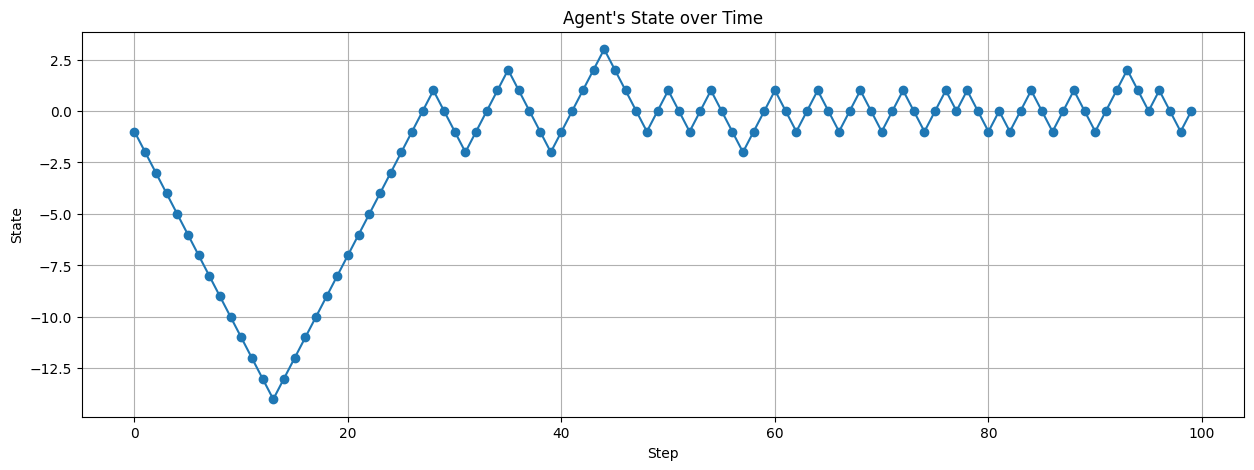

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
# --- Visualization with Matplotlib ---
plt.plot(states, marker='o')
plt.title("Agent's State over Time")
plt.xlabel("Step")
plt.ylabel("State")
plt.grid()
plt.show()

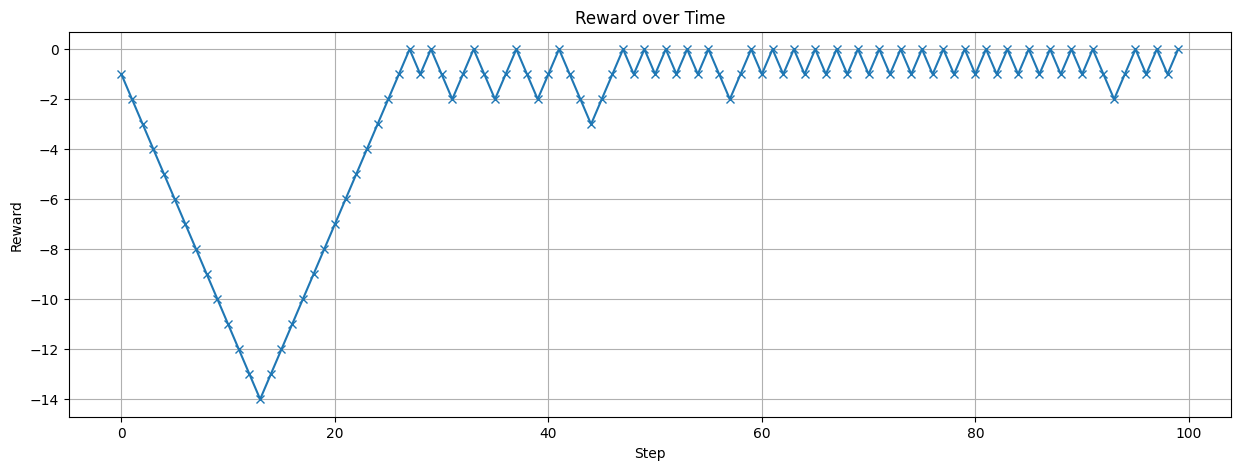

In [47]:
plt.figure(figsize=(15, 5))
plt.plot(rewards, marker='x')
plt.title("Reward over Time")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.grid()
plt.show()

## **✨02 - Coin Flip Game**

🔹 What Happens

- The agent can choose: `"heads"` or `"tails"`.
- The environment flips a `fair coin`.
- If agent guesses right → reward = `+1`.
- If wrong → reward = `-1`.
- This is super basic but shows the core RL loop: `choose → act → reward → learn`.

In [52]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt

# --- Environment ---
class CoinFlip:
    def execute(self, action):
        outcome = random.choice(["heads", "tails"])
        reward = 1 if action == outcome else -1
        return outcome, reward


# --- Q-learning Agent ---
class QLearningAgent:
    def __init__(self, actions, alpha=0.5, gamma=0.9, epsilon=0.2):
        self.q_table = defaultdict(lambda: {a: 0.0 for a in actions})
        self.actions = actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    
    def choose_action(self, state="coin"):
        # No real state, just a dummy
        if random.random() < self.epsilon:
            return random.choice(self.actions)  # explore
        return max(self.q_table[state], key=self.q_table[state].get)
    
    def update(self, action, reward, state="coin", next_state="coin"):
        q_current = self.q_table[state][action]
        q_next_max = max(self.q_table[next_state].values())
        self.q_table[state][action] += self.alpha * (reward + self.gamma * q_next_max - q_current)


# --- Training Loop ---
env = CoinFlip()
agent = QLearningAgent(actions=["heads", "tails"])

actions_taken = []
outcomes = []
rewards = []

n_rounds = 50
for i in range(n_rounds):
    action = agent.choose_action()
    outcome, reward = env.execute(action)
    agent.update(action, reward)
    
    actions_taken.append(action)
    outcomes.append(outcome)
    rewards.append(reward)
    
    print(f"Round {i+1:2d}: guessed={action}, outcome={outcome}, reward={reward}")

print("\n--- Learned Q-values ---")
print(agent.q_table["coin"])


Round  1: guessed=heads, outcome=tails, reward=-1
Round  2: guessed=tails, outcome=heads, reward=-1
Round  3: guessed=heads, outcome=tails, reward=-1
Round  4: guessed=tails, outcome=tails, reward=1
Round  5: guessed=tails, outcome=tails, reward=1
Round  6: guessed=tails, outcome=heads, reward=-1
Round  7: guessed=tails, outcome=tails, reward=1
Round  8: guessed=tails, outcome=tails, reward=1
Round  9: guessed=tails, outcome=tails, reward=1
Round 10: guessed=heads, outcome=heads, reward=1
Round 11: guessed=tails, outcome=tails, reward=1
Round 12: guessed=tails, outcome=heads, reward=-1
Round 13: guessed=tails, outcome=tails, reward=1
Round 14: guessed=tails, outcome=heads, reward=-1
Round 15: guessed=tails, outcome=tails, reward=1
Round 16: guessed=tails, outcome=tails, reward=1
Round 17: guessed=tails, outcome=heads, reward=-1
Round 18: guessed=tails, outcome=tails, reward=1
Round 19: guessed=tails, outcome=tails, reward=1
Round 20: guessed=tails, outcome=tails, reward=1
Round 21: gue

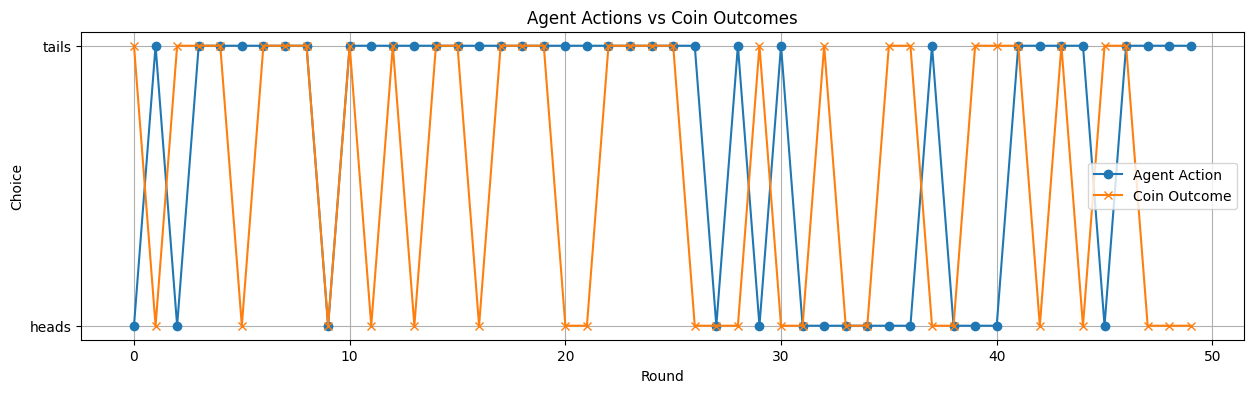

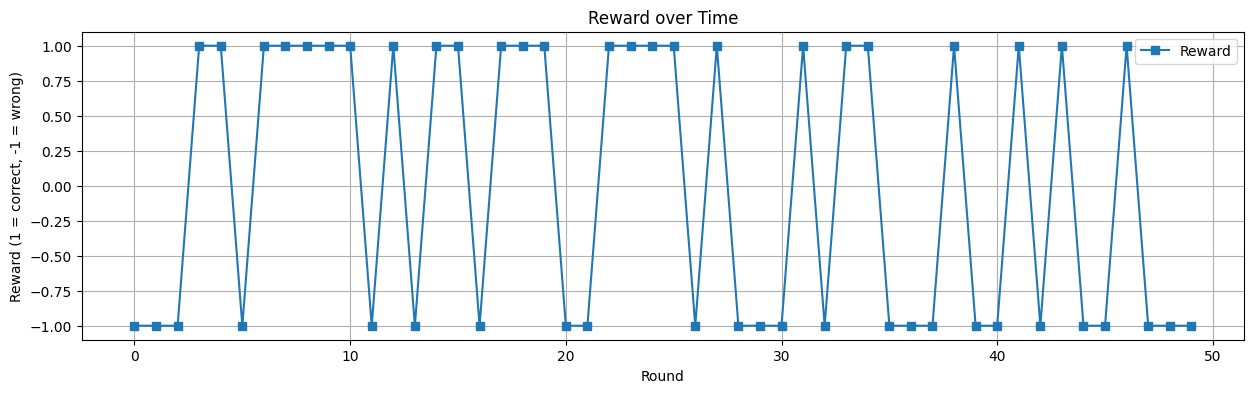

In [55]:
# --- Visualization ---
# Map "heads"=0, "tails"=1 for plotting
action_map = {"heads": 0, "tails": 1}
outcome_map = {"heads": 0, "tails": 1}

plt.figure(figsize=(15,4))
plt.plot([action_map[a] for a in actions_taken], label="Agent Action", marker="o")
plt.plot([outcome_map[o] for o in outcomes], label="Coin Outcome", marker="x")
plt.yticks([0,1], ["heads","tails"])
plt.title("Agent Actions vs Coin Outcomes")
plt.xlabel("Round")
plt.ylabel("Choice")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(rewards, marker="s", label="Reward")
plt.title("Reward over Time")
plt.xlabel("Round")
plt.ylabel("Reward (1 = correct, -1 = wrong)")
plt.legend()
plt.grid(True)
plt.show()

## **✨03 - Line World** 

The **Line World** is one of the most classic toy environments for RL. It’s basically a **1D maze** where the agent learns to reach the goal and avoid the pit.


**🟢 Line World Setup**

* States: `[-2, -1, 0, +1, +2]`
* Start: `0` (middle)
* Actions: `"left"` or `"right"`
* Rewards:
  * `+2` → **Goal** (reward = `+1`)
  * `-2` → **Pit** (reward = `-1`)
  * Elsewhere → `0` (neutral step)

>👉 The agent must learn: *“Go right → reach the goal!”*


**🔹 What You Learn**

* RL is about **trial and error**.
* At first, the agent stumbles randomly.
* Over episodes, Q-values push it to prefer **going right → reaching the goal**.

In [11]:
import random
from collections import defaultdict

# --- Environment ---
class LineWorld:
    def __init__(self):
        self.state = 0  # start at middle
    
    def get_initial_state(self):
        self.state = 0
        return self.state
    
    def execute(self, action):
        # Move agent
        if action == "left":
            self.state -= 1
        elif action == "right":
            self.state += 1

        # Clip state to range [-2, 2]
        self.state = max(-2, min(2, self.state))

        # Rewards
        if self.state == 2:
            reward = 1   # goal
        elif self.state == -2:
            reward = -1  # pit
        else:
            reward = 0   # neutral
        return self.state, reward


# --- Agent (Q-learning) ---
class QLearningAgent:
    def __init__(self, actions, alpha=0.5, gamma=0.9, epsilon=0.3):
        self.q_table = defaultdict(lambda: {a: 0.0 for a in actions})
        self.actions = actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.actions)  # explore
        return max(self.q_table[state], key=self.q_table[state].get)
    
    def update(self, state, action, reward, next_state):
        q_current = self.q_table[state][action]
        q_next_max = max(self.q_table[next_state].values())
        self.q_table[state][action] += self.alpha * (reward + self.gamma * q_next_max - q_current)


# --- Training loop ---
env = LineWorld()
agent = QLearningAgent(actions=["left", "right"])

episodes = 20
for ep in range(episodes):
    state = env.get_initial_state()
    print(f"\nEpisode {ep+1}")
    for step in range(10):  # limit steps per episode
        action = agent.choose_action(state)
        next_state, reward = env.execute(action)
        agent.update(state, action, reward, next_state)
        state = next_state
        print(f" Step {step}: state={state}, action={action}, reward={reward}")
        if reward != 0:  # stop when goal/pit reached
            break

print("\n--- Learned Q-table ---")
for s in range(-2, 3):
    print(f"State {s}: {agent.q_table[s]}")



Episode 1
 Step 0: state=-1, action=left, reward=0
 Step 1: state=-2, action=left, reward=-1

Episode 2
 Step 0: state=-1, action=left, reward=0
 Step 1: state=0, action=right, reward=0
 Step 2: state=1, action=right, reward=0
 Step 3: state=0, action=left, reward=0
 Step 4: state=-1, action=left, reward=0
 Step 5: state=0, action=right, reward=0
 Step 6: state=-1, action=left, reward=0
 Step 7: state=-2, action=left, reward=-1

Episode 3
 Step 0: state=-1, action=left, reward=0
 Step 1: state=-2, action=left, reward=-1

Episode 4
 Step 0: state=-1, action=left, reward=0
 Step 1: state=0, action=right, reward=0
 Step 2: state=-1, action=left, reward=0
 Step 3: state=-2, action=left, reward=-1

Episode 5
 Step 0: state=-1, action=left, reward=0
 Step 1: state=0, action=right, reward=0
 Step 2: state=-1, action=left, reward=0
 Step 3: state=0, action=right, reward=0
 Step 4: state=-1, action=left, reward=0
 Step 5: state=0, action=right, reward=0
 Step 6: state=-1, action=left, reward=0

### **Output Explained**

```python
Episode 1
 Step 0: state=1, action=right, reward=0
 Step 1: state=2, action=right, reward=1   ✅ goal reached!

Episode 2
 Step 0: state=-1, action=left, reward=0
 Step 1: state=-2, action=left, reward=-1  ❌ pit!

...

--- Learned Q-table ---
State -2: {'left': 0.0, 'right': 0.0}
State -1: {'left': -0.3, 'right': 0.2}
State  0: {'left': -0.1, 'right': 0.5}  👈 prefers right
State  1: {'left': 0.0, 'right': 0.8}   👈 strongly prefers right
State  2: {'left': 0.0, 'right': 0.0}
```